# Global Optimization

Optimization tasks are usually focused on finding a global maximum (or minimum). Sometimes deterministic search methods get stuck in a local optimum and never find the global optimal solution. Stochastic methods, such as Monte Carlo methods, can improve search methods by helping algorithms escape these local optimal solution in order to move closer towards the global optimal solution. 

In most real-world tasks, you may never find the global maximum, but usually the closer we get the better.


![alt text](hills_copy.png "Maximization Problem")


# Genetic Algorithms

> Genetic algorithms (GAs) are stochastic search algorithms inspired by the basic principles of biological evolution and natural selection. GAs simulate the evolution of living organisms, where the fittest individuals dominate over the weaker ones, by mimicking the biological mechanisms of evolution, such as selection, crossover, and mutation.

[GA: A Package for Genetic Algorithms in R](https://cran.r-project.org/web/packages/GA/vignettes/GA.html)


## Basic hill climbing (local search) algorithm

Given a function $f(\cdot)$ we're trying to maximize (or minimize)

1. $x_0$ = starting solution (can be random)

2. for i in 1:N, do

    1. look around the neighborhood of $x_{i-1}$ by some $\delta$, and evaluate $f(x \pm \delta)$
    
    2. Choose the neightbor with the highest (or lowest) value for $f(\cdot)$

3. Return the $x_i$ value with the highest (or lowest) value of $f(\cdot)$. This will usually be the last value as the hill climbing algorithm never chooses a step that does not improve in $f(\cdot)$; therefore, it will never climb down (or up) from a local maximum (or minimum).

An improvement on the above algorithm is one with random restarts, but that still faces the problem of never actually escaping a local optimum.

## Genetic Algorithm for numerical optimization



GAs use evolutionary strategies inspired by the basic principles of biological evolution. At the start of the algorithm, a population is initialized with individuals (or units) of varying `fitness`. Each inividual is made up of genes, features, or characters which control the inheritance of one or several characters. 

The fitness of each individual is evaluated and over time the fittest individuals reproduce, passing
their genetic information to their offspring. Thus, with the selection operator, GAs mimic the behavior of natural organisms in a competitive environment, in which only the most qualified and their offspring survive. 

Two important issues in the evolution process of GAs search are exploration and exploitation. Exploration is the creation of population diversity by exploring the search space, and is obtained by genetic operators, such as mutation and crossover. 

- Crossover forms new offsprings from two parent chromosomes by combining part of the genetic information from each. On the contrary, mutation is a genetic operator that randomly alters the values of genes in a parent chromosome. 

- Exploitation aims at reducing the diversity in the population by selecting at each stage the individuals with higher fitness (not allowing selection to be dictated by chance).

- Often an elitist strategy is also employed, by allowing the fittest individuals to persist into the next generation in case they did not survive (resampled).

### Some General GA Steps

The algorithm we will follow is simple. Given a `fitness function`, $f(\cdot)$ we are trying to maximize, and for a certain number of generations, $N$, do the following

1. Initialize the population with characteristics you'd like to explore (can be random or predetermined); `parents`

2. Calculate the fitness of all units/individuals in the population

    1. (Optional) Keep track of the fittest individual(s) throughout all generations

3. Sample the `parents` with sampling weights based on fitness (i.e. those with greater fitness have greater likelihood of being resampled); these will be used to create `children` for the next generation

    4. With some `mutation rate` mutate the `parents`

    5. (Optional) With some `crossover rate` select pairs of `parents` and randomly combine characteristics

4. The population from steps 4-5 become the `children` from the previous generation. Repeate steps 2-4.

![alt text](ga-diagram.jpg "Genetic Algorithm skeleton")

The following example was inspired by the **GA** R package. Refer to this [link](https://cran.r-project.org/web/packages/GA/vignettes/GA.html) for details about genetic algorithms with R.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def _fitness(x):
    #x = np.array(x)
    if x > -11 and x < 11:
        y = (x**2+x)*np.cos(2*x) + x**2
        return round(y, 6)
    else:
        return 0

fitness = np.vectorize(_fitness)

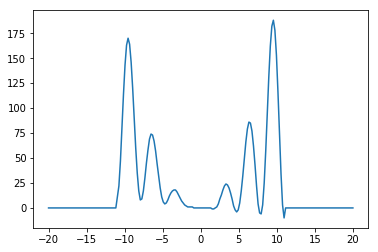

In [2]:
x = np.linspace(start=-20, stop=20, num=200) ## population range
plt.plot(x, fitness(x))

### GA Optimization

We need to modify the above generic algorithm for our numerical problem


The algorithm we will follow is simple. Given a `fitness function`, $h(x) = (x^2 + x) \times cos(2x) + x^2$ we are trying to maximize, and for a certain number of generations, $N$, do the following

1. Initialize `parents` by creating an array of uniformly distributed values over the domain of $h(x)$.

2. Calculate the fitness of all units/individuals in the population

    1. Keep track of the fittest individual(s) throughout all generations

3. Sample the `parents` with sampling weights based on fitness (i.e. those with greater fitness have greater likelihood of being resampled); these will be used to create `children` for the next generation

    4. With some `mutation rate` mutate the `parents`

    5. (Optional) With some `crossover rate` select pairs of `parents` and randomly combine characteristics

4. The population from steps 4-5 become the `children` from the previous generation. Repeate steps 2-4.

In this example, everyone has 1 attribute or chromosome, that's their current value. 

In the `mutation` step, we'll generate $\epsilon$ from some symmetrical distribution. This can be a uniform or Normal distribution. Then, for every unit in the current population, we'll add (or subtract) $\epsilon$.

We'll skip `crossover` in this example.

In [3]:
def mutate(parents, fitness_function):
    n = int(len(parents))
    scores = fitness_function(parents)
    idx = scores > 0 ## positive values only
    scores = scores[idx]
    parents = np.array(parents)[idx]
    ## resample parents with probabilities proportional to fitness
    ## then, add some noise for 'random' mutation
    children = np.random.choice(parents, size=n, p = scores / scores.sum()) 
    children = children + np.random.uniform(-0.51,0.51, size=n)  # add some noise to mutate
    return children.tolist() ## convert array to list
    

In [4]:
def GA(parents, fitness_function, popsize = 100, max_iter = 100):
    History = []
    ## initial parents; gen zero
    best_parent, best_fitness = _get_fittest_parent(parents, fitness) # extract fittest individual
    print('generation {}| best fitness {}| current fitness {} | current_parent {}'.format(0, best_fitness, best_fitness, best_parent))
    
    # first plot the initial parents
    x = np.linspace(start=-20, stop=20, num=200) ## population range
    plt.plot(x, fitness_function(x))
    plt.scatter(parents, fitness_function(parents), marker= 'x')    
    
    ## for each next generation
    for i in range(1, max_iter):
        parents = mutate(parents, fitness_function=fitness_function)
        
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function) # extract fittest individual
    
        # update best fitness values
        if curr_fitness > best_fitness:
            best_fitness = curr_fitness 
            best_parent = curr_parent 
            
        curr_parent, curr_fitness = _get_fittest_parent(parents, fitness_function)
        if i % 10 == 0:
            print('generation {}| best fitness {}| current fitness {} | current_parent {}'.format(i, best_fitness, curr_fitness, curr_parent))
        History.append((i, np.max(fitness_function(parents)))) # save generation MAX fitness   
    
    plt.scatter(parents, fitness_function(parents))
    plt.scatter(best_parent, fitness_function(best_parent), marker = '.', c = 'b', s = 200)
    plt.pause(0.09)
    plt.ioff()
    ## return best parents
    print('generation {}| best fitness {}| best_parent {}'.format(i, best_fitness, best_parent))
        
    return best_parent, best_fitness, History



In [5]:
def _get_fittest_parent(parents, fitness):
    _fitness = fitness(parents)
    PFitness = list(zip(parents, _fitness))
    PFitness.sort(key = lambda x: x[1], reverse=True)
    best_parent, best_fitness = PFitness[0]
    return round(best_parent, 4), round(best_fitness, 4)

In [6]:
x = np.linspace(start=-20, stop=20, num=200) ## population range
init_pop = np.random.uniform(low = -20, high = 20, size=100)

The algorithm will run for a total of 100 generations, with 100% mutation. The initial population was generate uniformly from the domain of $h$, with a size of 100 units.

generation 0| best fitness 170.3299| current fitness 170.3299 | current_parent -9.5385
generation 10| best fitness 188.9554| current fitness 188.9176 | current_parent 9.5057
generation 20| best fitness 188.9671| current fitness 188.8844 | current_parent 9.5426
generation 30| best fitness 188.9699| current fitness 188.9294 | current_parent 9.5077
generation 40| best fitness 188.9707| current fitness 188.9667 | current_parent 9.5174
generation 50| best fitness 188.9709| current fitness 188.9702 | current_parent 9.5201
generation 60| best fitness 188.9709| current fitness 188.9708 | current_parent 9.5211
generation 70| best fitness 188.9709| current fitness 188.9702 | current_parent 9.5201
generation 80| best fitness 188.9709| current fitness 188.9623 | current_parent 9.5285
generation 90| best fitness 188.9709| current fitness 188.9604 | current_parent 9.5292


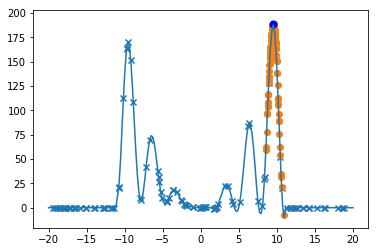

generation 99| best fitness 188.9709| best_parent 9.5215
top parent 9.5215, top fitness 188.9709


In [7]:
parent_, fitness_, history_ = GA(init_pop, fitness)
print('top parent {}, top fitness {}'.format(parent_, fitness_))

Above you can see the function $h$, and the initial population represented by the `x` markers on the plot. The orange dots represent the final population, and blue dot at the top represents the fittest value across all generations.

So it's clear to see that the GA was able to explore the domain of our fitness function, and find its way to the global optimum via stochastic steps.

Below is the maximum fitness over time. You can see it does fluctuate over time.

Text(0,0.5,'Fitness')

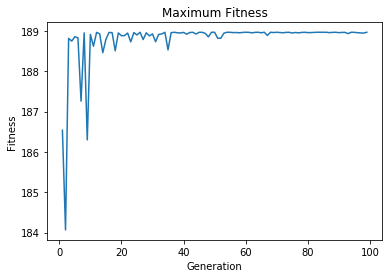

In [8]:
x, y = list(zip(*history_))
plt.plot(x, y)
plt.title('Maximum Fitness')
plt.xlabel("Generation")
plt.ylabel("Fitness")

Now run the `GA-Optimization-Example.py` script to see how the population evolves over time.